# Lab 3: Continuous Data

<img src="https://images.freeimages.com/images/large-previews/bc2/wine-1328360.jpg" width="500"/>

Today, we are going to work with a popular wine data set containing measurements for different attributes of wines. This makes it a perfect example to learn on how to handle continuous data.


## Before you start

If you haven't already, make sure to add [seaborn](https://seaborn.pydata.org/installing.html) and [scikit-learn](https://scikit-learn.org/stable/install.html) to your Python interpreter as you are going to need it to complete this exercise.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## TASK 1: Exploration and Initial Analysis (25%)


### 1. Loading the data set
Read in the file ``winedata.csv`` using [pandas](https://pandas.pydata.org/docs/reference/index.html#api) to start with the exploratory data analysis into the features (alcohol content, color and acidity among others) of our dataset.

In [2]:
df = pd.read_csv('winedata.csv')

### 2. Data Exploration (3%)

- Try to get an idea of what is stored in the .csv you just loaded into your notebook by printing and having a look at the data in ``df``.
- Next have a look at some basic statistics of each feature by calling the ``describe()`` function.
- Also, check for missing values (NaNs). You should remember one easy way from ``Lab02_Maps`` to do this.
- Leave short comments about what you found out in this initial phase of data exploration.

In [3]:
# YOUR CODE HERE
df.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,NaN,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,NaN,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# YOUR CODE HERE
df.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline
count,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.362659,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.276332,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.550000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
# YOUR CODE HERE
print(df.isna().sum())
df[df.isna().any(axis=1)]

Alcohol                 0
Malic_acid              0
Ash                     5
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280315                0
Proline                 0
dtype: int64


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280315,Proline
2,13.16,2.36,NaN,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,NaN,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
6,14.39,1.87,NaN,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,NaN,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
9,13.86,1.35,NaN,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


### 2. Check for missing values (7%)

- After you checked for NaNs, find a way to retrieve the column names of the dataset containing NaNs dynamically using pure python or pandas.
- Store these column names as a list-like object in variable ``columns_containing_nans``.
- Next, dynamically calculate and then save the number of NaNs you found to ``number_of_nans``.

In [6]:
# YOUR CODE HERE

dfx = df.isna().any()
columns_containing_nans = dfx[dfx].index.tolist()

print("Columns containing nans:")
print(columns_containing_nans)

number_of_nans = df[columns_containing_nans].isna().sum().sum()
print("Amount of nans:")
print(number_of_nans)

# fix for later excercise
print('Rows indexes with nan values, i need these to drop them from the vineyard.csv later on')
nan_indexes = [index for index, row in df.iterrows() if row.isna().any()]
print(nan_indexes)

Columns containing nans:
['Ash']
Amount of nans:
5
Rows indexes with nan values, i need these to drop them from the vineyard.csv later on
[2, 3, 6, 7, 9]


In [7]:
# Ignore this cell - it is needed for automated grading.

### 3. Data Preprocessing (7%)
- Clean the dataset using one of the methods you know about. See Lecture 5 if you need to refresh your memory.
- Be careful to do this operation **inplace** (keep `df` as the variable name for your data).

In [8]:
# YOUR CODE HERE
print(len(df))
# outputs 178 rows, dropping 5 of them (all the rows with nan values) wont make a big difference

df.dropna(inplace=True)
print(len(df))

178
173


In [9]:
# Ignore this cell - it is needed for automated grading.

### 3. Data Preprocessing (cont.) (3%)
Elaborate on your choice of preprocessing method used in cleaning the data set (max. three sentences)

I checked the total amount of rows. It's 178. We have 5 rows containing NaN values. It would be foolish to drop the column, we would lose too much information for all the other 173 rows. We could replace the values but that would introduce probbaly false data to the set so to keep it real & legit, I decided to just drop the rows. Dropping 5 rows out of 178 doesn't make a really big impact as it is only 2.8% of the whole dataset.

### 4. Data Visualization (5%)

- Use seaborn to draw a boxplot of each feature in a single plot.
- Make sure that your plot contains all necessary information (e.g. title, axis labels, ...), increase the figure's size and/or resolution to acceptable levels and ensure that all textual information provided is readable.

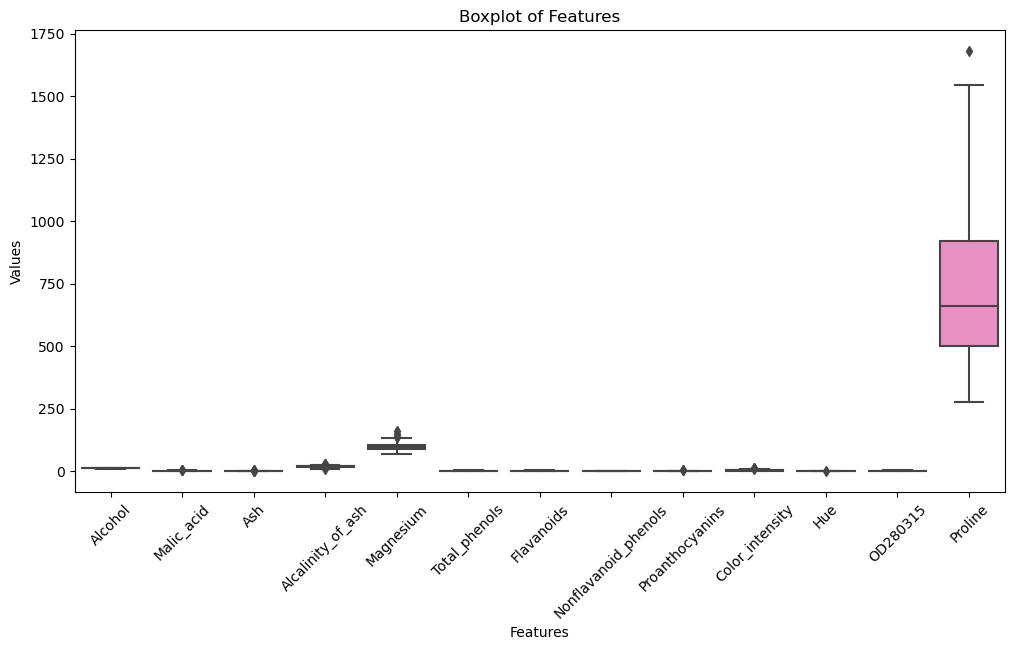

In [10]:
# YOUR CODE HERE

plt.figure(figsize=(12, 6))

sns.boxplot(data=df)

plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')

plt.xticks(rotation=45)

plt.show()

## TASK 2: Applying Normalization (25%)

### 1. Scaling (20%)

- Since our features exhibit data in all kinds of value ranges and units, we may want to find a way to normalize the information found within ``winedata.csv``.
- One possible technique used to normalize data is to transform each feature in such a way that its mean is 0 with standard deviation 1. Luckily, [scikit-learn's](https://scikit-learn.org/stable/auto_examples/index.html) [``StandardScaler()``](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) provides an easy way to achieve this.
- This way, you'll also get to know some concepts commonly used in machine learning pipelines such as ``fitting`` and ``transforming`` data.
- Normalize the data using ``StandardScaler()``, then store the normalized data in DataFrame `df_s`.

In [11]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_s = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [12]:
# Ignore this cell - it is needed for automated grading.

### 2. Data Visualization (5%)

- Redraw a boxplot using ``df_s`` to visualize the effect scaling has on the features in ``winedata.csv``.
- Make sure that your plot is readable and contains all necessary information (e.g. title, axis labels, ...).
- Include a short comment describing what you see. Focus on the comparison of the two boxplots in TASK 1 and TASK 2.

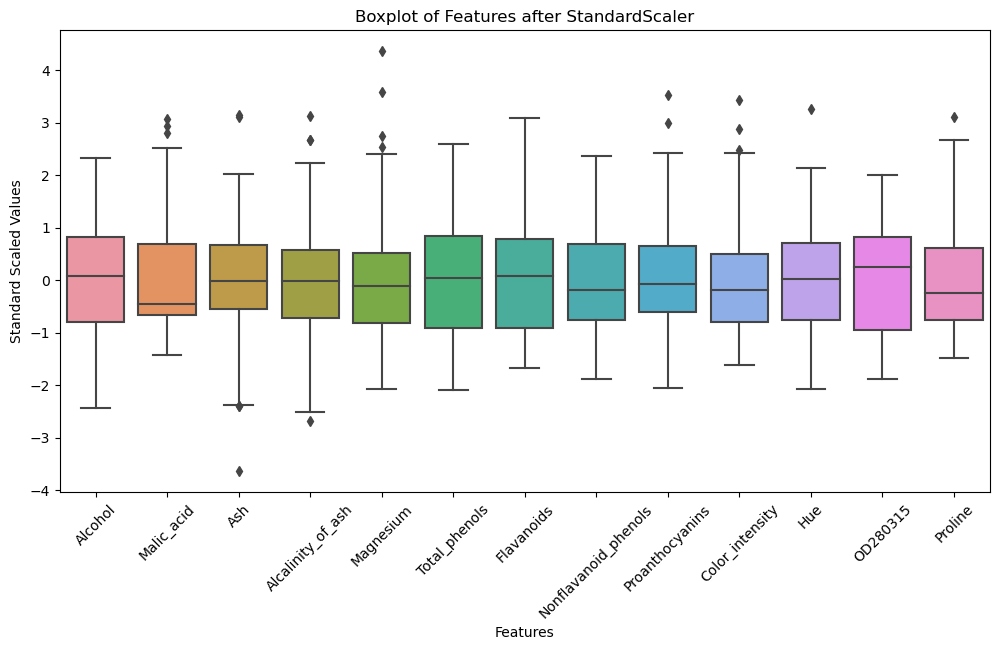

In [13]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_s)

plt.title('Boxplot of Features after StandardScaler')
plt.xlabel('Features')
plt.ylabel('Standard Scaled Values')

plt.xticks(rotation=45)

plt.show()

# On the first graph we can not see any usefull information on the graph.
# The scale of the different values are so different, almost all of the boxplots seem like they're 1px big.
# I tried to drop the Proline column and re render the graph. After that we still had the same issue with Magnesium.
# I dropped both columns for the graph and only then we could see some usefull boxplot graphs.
# To fix this issue we used a StandardScaler on the dataframe and therefore we can now see the distribution of the values better

# Standard Scaler explaination : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize features by removing the mean and scaling to unit variance.
# The standard score of a sample x is calculated as:
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation
# of the training samples or one if with_std=False.

## TASK 3: Dimensionality Reduction (35%)

Trying to figure out similarities between the data points (=wines) in our data set is a challenging task. As it stands, we have thirteen features describing each wine. In the best case scenario, we need a way to reduce the dimensionality of the dataset to two dimensions to be able to visualize relationships between wines in a way humans can comprehend.

There are many different ways to do this. You may, for example, simply select two features from the thirteen by hand to achieve this. This approach has some limitations though, as you lose all the information present in the other eleven columns.

Other techniques are [``PCA``](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and [``TSNE``](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), both well known and state of the art methods to implement dimensionality reduction. Consult ``scikit-learn``'s docs or your lecturer if you want to know more about how these techniques work.

### 1. Apply either PCA or TSNE to ``df_s`` (25%)

- Similarly to the way you used ``StandardScaler``, instantiate an object of your preferred method for dimensionality reduction. - This time, you need to parametrize this object, so make sure to set the number of target dimensions to $2$.
- Then, ``fit`` and ``transform`` the scaled data in ``df_s`` into a two dimensional space. Store your 2-D Data in DataFrame `df_d`.

In [14]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_d = pd.DataFrame(pca.fit_transform(df_s), columns=['Dimension 1', 'Dimension 2'])

In [15]:
# Ignore this cell - it is needed for automated grading.

### 2. Data Visualization (10%)
- Draw a scatterplot plotting the first against the second dimension in ``df_d``.
- Make sure that your plot is readable and contains all necessary information (e.g. title, axis labels, ...).

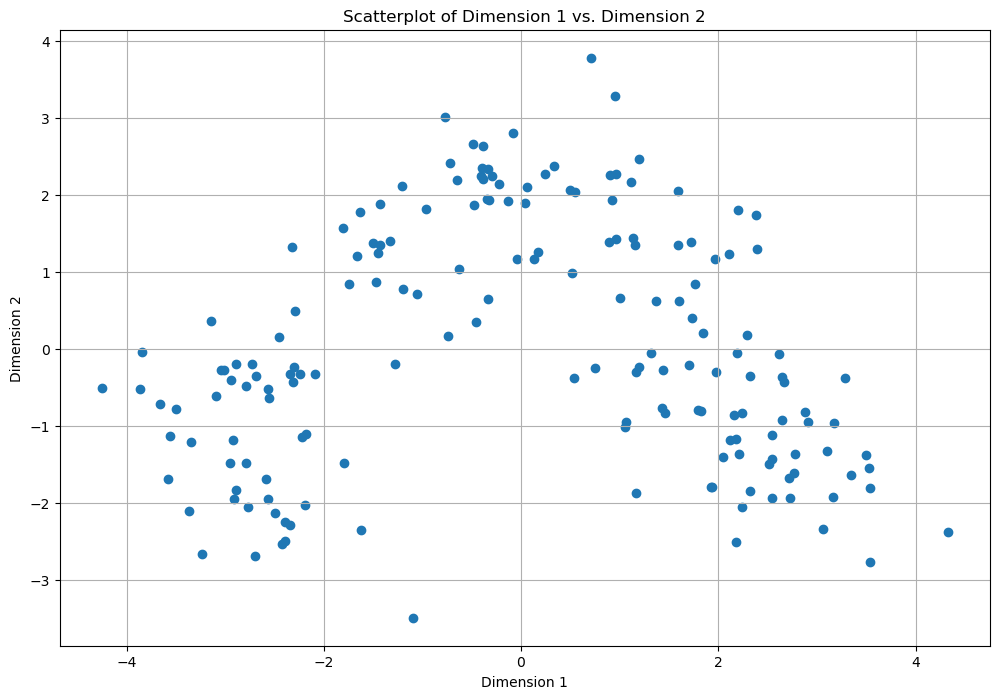

In [16]:
# YOUR CODE HERE
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.scatter(df_d['Dimension 1'], df_d['Dimension 2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatterplot of Dimension 1 vs. Dimension 2')
plt.show()

## TASK 4: Add some color! (15%)
- Load ``winelabels.csv`` containing indicators for the vineyard that produced the wines.
- These labels are stored as integers ranging from 0 to 2.
- Use this information to enhance your scatterplot by assigning a color to each point by it's label.
- Add a legend to your plot, indicating which color corresponds to which vineyard.
- Make sure that your plot is readable and contains all necessary information (e.g. title, axis labels, ...).


- Lastly, comment on what you see when comparing the two scatterplots you created in TASK 3 and TASK 4.
- Are you able to make an assumption about the similarity of wines when compared to those of the same vineyard and those of other producers?

C:\Users\quint\AppData\Local\Temp\ipykernel_13276\2738568197.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df_d[winelabels['Vineyard'] == label]


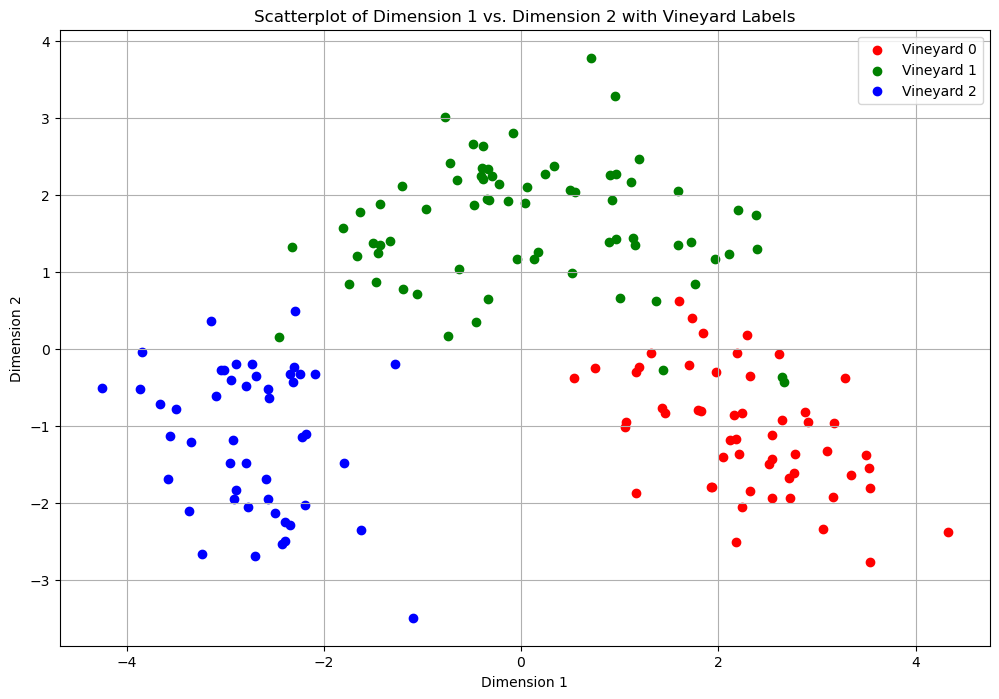

In [17]:
# YOUR CODE HERE

winelabels = pd.read_csv('winelabels.csv', header=None, names=['Vineyard'])

# oepsie, because I dropped the nan values before I am now kinda in trouble.
# I will need to drop the same cells from the winelabels.

winelabels = winelabels.drop(nan_indexes)
winelabels = winelabels.reset_index(drop=True)

plt.figure(figsize=(12, 8))

colors = {0: 'red', 1: 'green', 2: 'blue'}

for label in winelabels['Vineyard'].unique():
    subset = df_d[winelabels['Vineyard'] == label]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=f'Vineyard {label}', color=colors[label])

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatterplot of Dimension 1 vs. Dimension 2 with Vineyard Labels')
plt.legend()
plt.grid(True)
plt.show()